In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[0]

In [ ]:
single_image.shape

(28, 28)

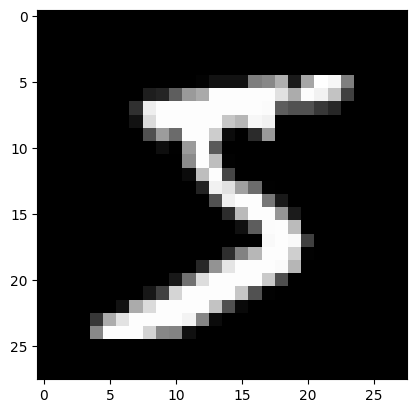

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

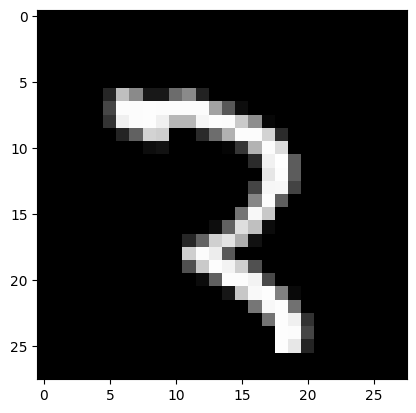

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 32)                173088    
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 29s 29ms/step - loss: 0.2378 - accuracy: 0.9280 - val_loss: 0.0726 - val_accuracy: 0.9763
Epoch 2/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0717 - accuracy: 0.9782 - val_loss: 0.0604 - val_accuracy: 0.9806
Epoch 3/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0505 - accuracy: 0.9847 - val_loss: 0.0510 - val_accuracy: 0.9838
Epoch 4/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0411 - accuracy: 0.9870 - val_loss: 0.0516 - val_accuracy: 0.9839
Epoch 5/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0315 - accuracy: 0.9902 - val_loss: 0.0427 - val_accuracy: 0.9864


In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.237760,0.928017,0.072553,0.9763
1,0.071691,0.978217,0.060381,0.9806
2,0.050520,0.984717,0.050979,0.9838
3,0.041147,0.987017,0.051592,0.9839
4,0.031545,0.990217,0.042749,0.9864


212221230016 SOWMIYA N


<Axes: >

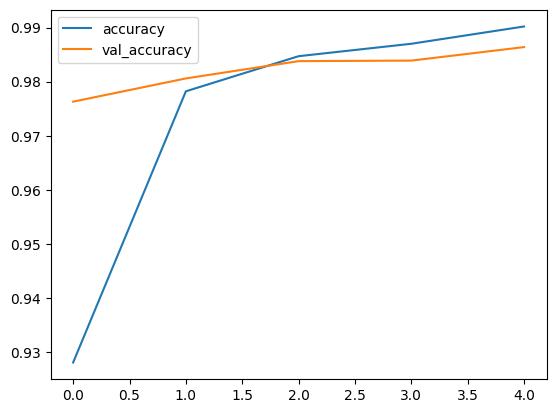

In [ ]:
print("212221230016 SOWMIYA N")
metrics[['accuracy','val_accuracy']].plot()

212221230016 SOWMIYA N


<Axes: >

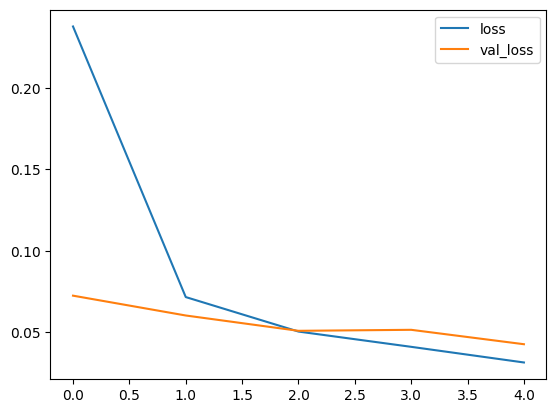

In [ ]:
print("212221230016 SOWMIYA N")
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 5ms/step


In [ ]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 970    0    1    2    0    0    2    0    3    2]
 [   0 1134    0    1    0    0    0    0    0    0]
 [   1    3 1018    4    1    0    0    4    1    0]
 [   0    0    0 1001    0    6    0    0    3    0]
 [   0    0    1    0  970    0    4    0    2    5]
 [   1    0    0    5    0  882    3    0    1    0]
 [   4    4    0    1    2    2  942    0    3    0]
 [   1    3    7    1    0    0    0 1010    4    2]
 [   4    0    6    3    0    2    0    1  955    3]
 [   0    6    1    5    8    4    0    2    1  982]]


In [ ]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
img = image.load_img('img6n.png')

In [ ]:
type(img)

PIL.Image.Image

In [ ]:
img = image.load_img('img6n.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 34ms/step


In [ ]:
print(x_single_prediction)

[6]


212221230016 SOWMIYA N


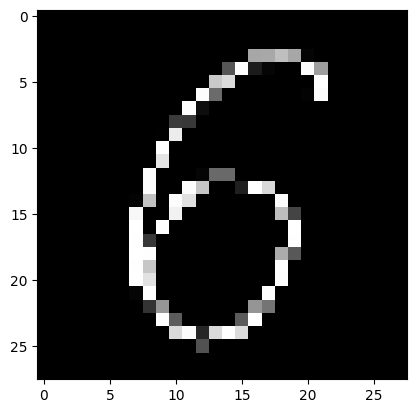

In [ ]:
print("212221230016 SOWMIYA N")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [ ]:
img1 = image.load_img('img9.png')
img_tensor1 = tf.convert_to_tensor(np.asarray(img1))
img_28_gray1 = tf.image.resize(img_tensor1,(28,28))
img_28_gray1 = tf.image.rgb_to_grayscale(img_28_gray1)
img_28_gray_inverted1 = 255.0-img_28_gray1
img_28_gray_inverted_scaled1 = img_28_gray_inverted1.numpy()/255.0

In [ ]:
x_single_prediction1 = np.argmax(
    model.predict(img_28_gray_inverted_scaled1.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 32ms/step


In [ ]:
print(x_single_prediction1)

[8]
